In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-price/real_estate_price_size.csv


# import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data

In [3]:
data = pd.read_csv('/kaggle/input/real-estate-price/real_estate_price_size.csv')
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [4]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


# create the regression

In [5]:
x1 = data['size']
y = data['price']

In [6]:
x1

0      643.09
1      656.22
2      487.29
3     1504.75
4     1275.46
       ...   
95     549.80
96    1037.44
97    1504.75
98     648.29
99     705.29
Name: size, Length: 100, dtype: float64

In [7]:
y

0     234314.144
1     228581.528
2     281626.336
3     401255.608
4     458674.256
         ...    
95    252460.400
96    310522.592
97    383635.568
98    225145.248
99    274922.856
Name: price, Length: 100, dtype: float64

# Explore the data

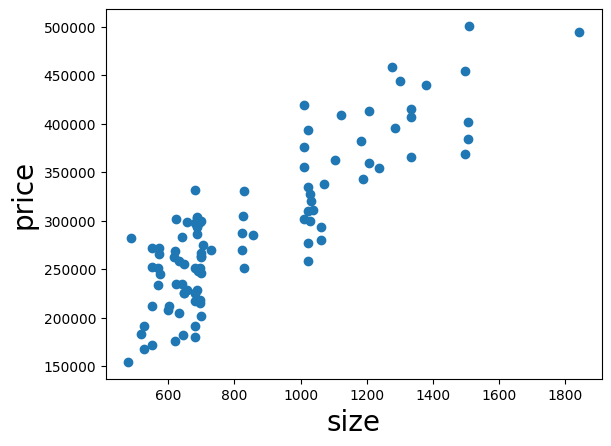

In [8]:
plt.scatter(x1,y)
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

# Regression

In [9]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           8.13e-31
Time:                        07:25:32   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

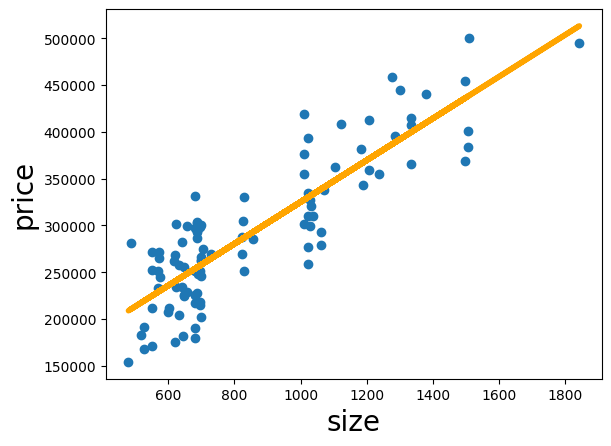

In [10]:
plt.scatter(x1, y)
yhat = 223.1787	* x1 + 101900
fig = plt.plot(x1, yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()